In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
df = pd.read_csv('/Salary_Data.csv')
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
X = df['YearsExperience'].values.reshape(-1, 1)
Y = df['Salary'].values.reshape(-1, 1)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
class Linear_Regression():
    def __init__(self, learning_rate, no_of_itr):
        self.learning_rate = learning_rate
        self.no_of_itr = no_of_itr

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_itr):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        dw = -(self.X.T).dot(self.Y - Y_prediction) / self.m
        db = -np.sum(self.Y - Y_prediction) / self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b

    def print_weights(self):
        print('Weights for the respective features are :')
        print(self.w)
        print('Bias value for the regression is ', self.b)

In [9]:
model = Linear_Regression(learning_rate=0.03, no_of_itr=2000)
model.fit(X_train, Y_train)

In [10]:
model.print_weights()

Weights for the respective features are :
[[9423.81854288]]
Bias value for the regression is  25321.561299548513


In [11]:
Y_pred = model.predict(X_test)

In [12]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

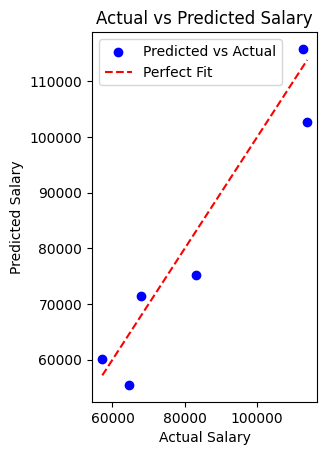

In [13]:
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()

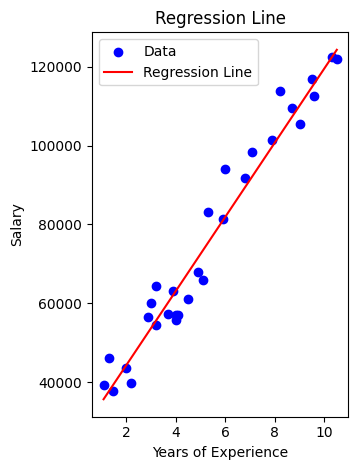

In [14]:
plt.subplot(1, 2, 2)
plt.scatter(df['YearsExperience'], df['Salary'], label='Data', color='blue')
X_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)
Y_line = model.predict(X_line)
plt.plot(X_line, Y_line, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Line')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 6286.45
Root Mean Squared Error (RMSE): 7059.05


In [17]:
mean_salary = df['Salary'].mean()
relative_mae = (mae / mean_salary) * 100
relative_rmse = (rmse / mean_salary) * 100

print(f"Средняя зарплата: {mean_salary:.2f}")
print(f"Относительная MAE: {relative_mae:.2f}%")
print(f"Относительная RMSE: {relative_rmse:.2f}%")

Средняя зарплата: 76003.00
Относительная MAE: 8.27%
Относительная RMSE: 9.29%
